<a name='top'></a>
Javier Lopez<br>
Student ID: 000697446
# Explore NYC Rideshare, Weather, Covid, and Vaccination Data
## Feb 2019-Mar 2022
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import zscore, linregress
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.weightstats import ztest
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)
plt.style.use('seaborn-whitegrid')
pd.set_option('mode.chained_assignment', None)
np.seterr(divide = 'ignore') 
warnings.filterwarnings('ignore')

In [2]:
cbcolors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']

## Load Data
***

In [3]:
data = pd.read_parquet('data/model_dataset.parquet')
data = data.nyc.drop(['snow', 'phase_0', 'phase_1', 'phase_2', 'phase_3'], axis=1)
lyft = data[['lyft']]
uber = data[['uber']]
weather = data[['temp', 'prec']]
covid = data[['case', 'hospitalized', 'death']]
vax = data[['vaccination']]

## Explore Data
***

In [4]:
data.head(3)

,uber,lyft,temp,prec,case,hospitalized,death,vaccination
2019-02-01,571535.0,197336.0,16.0,0.0,0.0,0.0,0.0,0.0
2019-02-02,594632.0,193081.0,25.0,0.0,0.0,0.0,0.0,0.0
2019-02-03,510417.0,174515.0,43.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data['all_rideshare'] = data.lyft + data.uber

In [6]:
data.head(3)

,uber,lyft,temp,prec,case,hospitalized,death,vaccination,all_rideshare
2019-02-01,571535.0,197336.0,16.0,0.0,0.0,0.0,0.0,0.0,768871.0
2019-02-02,594632.0,193081.0,25.0,0.0,0.0,0.0,0.0,0.0,787713.0
2019-02-03,510417.0,174515.0,43.0,0.0,0.0,0.0,0.0,0.0,684932.0


In [7]:
data.describe()

,uber,lyft,temp,prec,case,hospitalized,death,vaccination,all_rideshare
count,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000
mean,371898.495238,131524.856277,55.844589,0.142372,1703.722078,128.580087,29.886580,8094.685714,503423.351515
std,125425.096043,41589.468692,16.675251,0.403979,4610.714237,250.010869,74.772237,16973.681723,164163.514634
min,75549.000000,29797.000000,15.500000,0.000000,0.000000,0.000000,0.000000,0.000000,106105.000000
25%,286827.500000,106169.500000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,395022.000000
50%,367763.000000,131615.000000,56.000000,0.000000,443.000000,40.000000,7.000000,0.000000,506188.000000
75%,463908.000000,157127.500000,70.500000,0.070000,1502.500000,120.000000,27.000000,9752.000000,617459.500000
max,696721.000000,252442.000000,88.500000,7.130000,39408.000000,1667.000000,566.000000,145870.000000,938819.000000


In [8]:
p0_start, p1_start, p2_start, p3_start, fcast_start = ('2019-02-01', '2020-03-11', '2020-05-20', '2021-04-16', 
                                                       '2022-04-01')

In [9]:
p0, p1, p2, p3 = data[:p1_start], data[p1_start:p2_start], data[p2_start:p3_start], data[p3_start:fcast_start]

In [10]:
def plot_phases(shade=True, title=True, legend=False):
    if shade == True:
        plt.axvspan(p0_start, p1_start, alpha=0.1, color='lightgrey')
        plt.axvspan(p1_start, p2_start, alpha=0.1, color='#377eb8')
        plt.axvspan(p2_start, p3_start, alpha=0.1, color='#ff7f00')
        plt.axvspan(p3_start, fcast_start, alpha=0.1, color='#4daf4a')
        if legend == True:
            plt.legend(['Pre-Pandemic', 'Shutdown', 'Reopening', 'Vaccination'])
    if title == True:
        plt.figtext(0.2459, 0.05, 'Pre-Pandemic', bbox={'facecolor':'lightgrey', 'alpha': 0.1, 'pad':5})
        plt.figtext(0.4086, 0.05, 'Shutdown', bbox={'facecolor':'#377eb8', 'alpha': 0.1, 'pad':5})
        plt.figtext(0.5296, 0.05, 'Reopening', bbox={'facecolor':'#ff7f00', 'alpha': 0.1, 'pad':5})
        plt.figtext(0.7514, 0.05, 'Vaccination', bbox={'facecolor':'#4daf4a', 'alpha': 0.1, 'pad':5})   
    plt.grid(alpha=0.25)

In [11]:
phases_legend = ['Pre-pandemic\nFeb \'19 - Mar \'20\n', 'Shutdown\nMar \'20 - May \'20\n', 
                 'Reopening\nMay \'20 - Apr \'21\n', 'Vaccination\nApr \'21 - Apr \'22\n', 
                 'Forecast\nApr \'22 - Jul \'22']

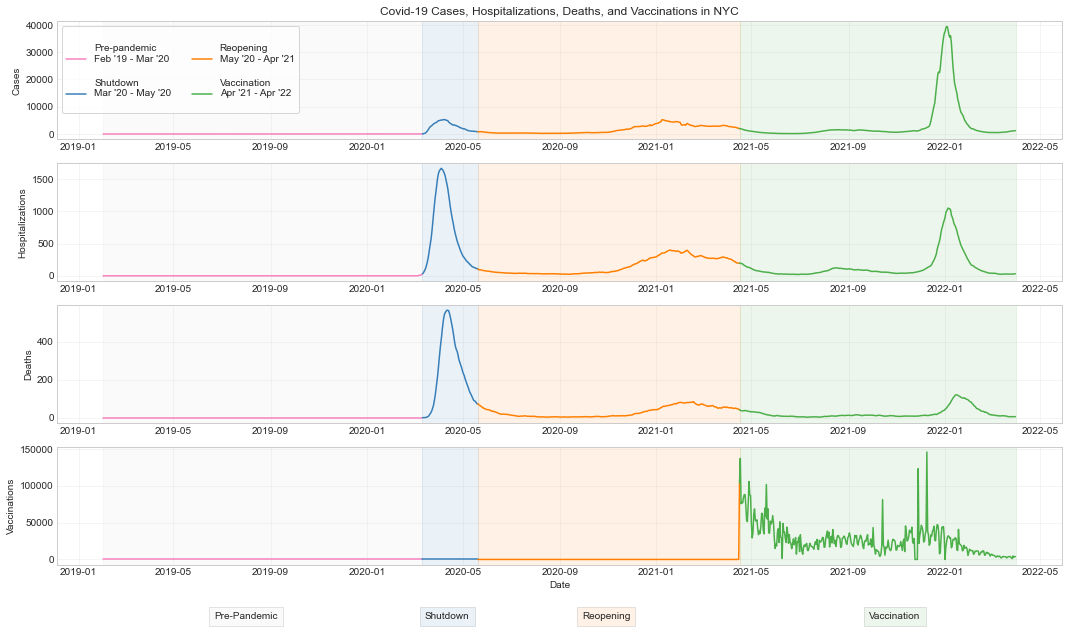

In [12]:
plt.subplot(411)
sns.lineplot(data=p0.case, color=cbcolors[3])
sns.lineplot(data=p1.case, color=cbcolors[0])
sns.lineplot(data=p2.case, color=cbcolors[1])
sns.lineplot(data=p3.case, color=cbcolors[2])
plt.title('Covid-19 Cases, Hospitalizations, Deaths, and Vaccinations in NYC')
plt.ylabel('Cases')
plt.legend(phases_legend, ncol=2, frameon=True, fancybox=True, title=' ')
plot_phases()
plt.subplot(412)
sns.lineplot(data=p0.hospitalized, color=cbcolors[3])
sns.lineplot(data=p1.hospitalized, color=cbcolors[0])
sns.lineplot(data=p2.hospitalized, color=cbcolors[1])
sns.lineplot(data=p3.hospitalized, color=cbcolors[2])
plt.ylabel('Hospitalizations')
plot_phases(title=False)
plt.subplot(413)
sns.lineplot(data=p0.death, color=cbcolors[3])
sns.lineplot(data=p1.death, color=cbcolors[0])
sns.lineplot(data=p2.death, color=cbcolors[1])
sns.lineplot(data=p3.death, color=cbcolors[2])
plt.ylabel('Deaths')
plot_phases(title=False)
plt.subplot(414)
sns.lineplot(data=p0.vaccination, color=cbcolors[3])
sns.lineplot(data=p1.vaccination, color=cbcolors[0])
sns.lineplot(data=p2.vaccination, color=cbcolors[1])
sns.lineplot(data=p3.vaccination, color=cbcolors[2])
plt.ylabel('Vaccinations')
plot_phases(title=False)
plt.xlabel('Date')
plt.show()

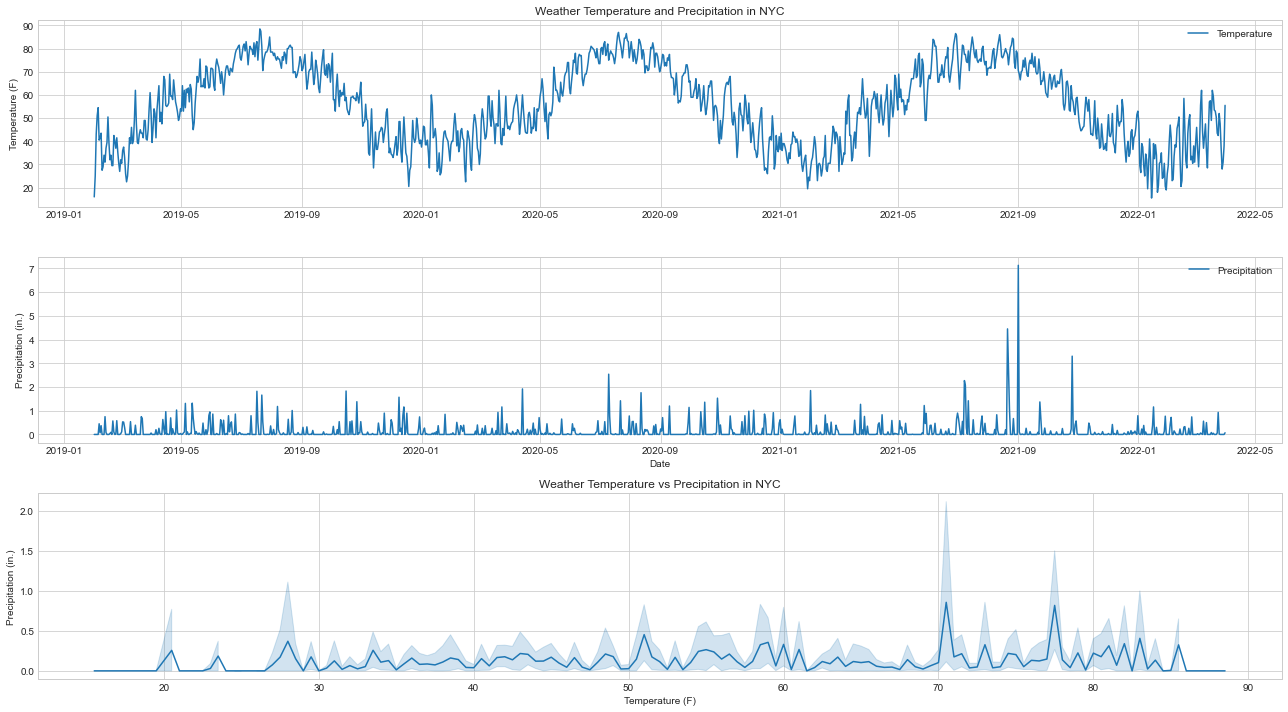

In [13]:
plt.subplot(311)
plt.title('Weather Temperature and Precipitation in NYC')
sns.lineplot(data=data.temp, label='Temperature')
plt.ylabel('Temperature (F)')
plt.subplot(312)
sns.lineplot(data=data.prec, label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (in.)')
plt.subplot(313)
sns.lineplot(data.temp, data.prec)
plt.title('Weather Temperature vs Precipitation in NYC')
plt.xlabel('Temperature (F)')
plt.ylabel('Precipitation (in.)')
plt.tight_layout()

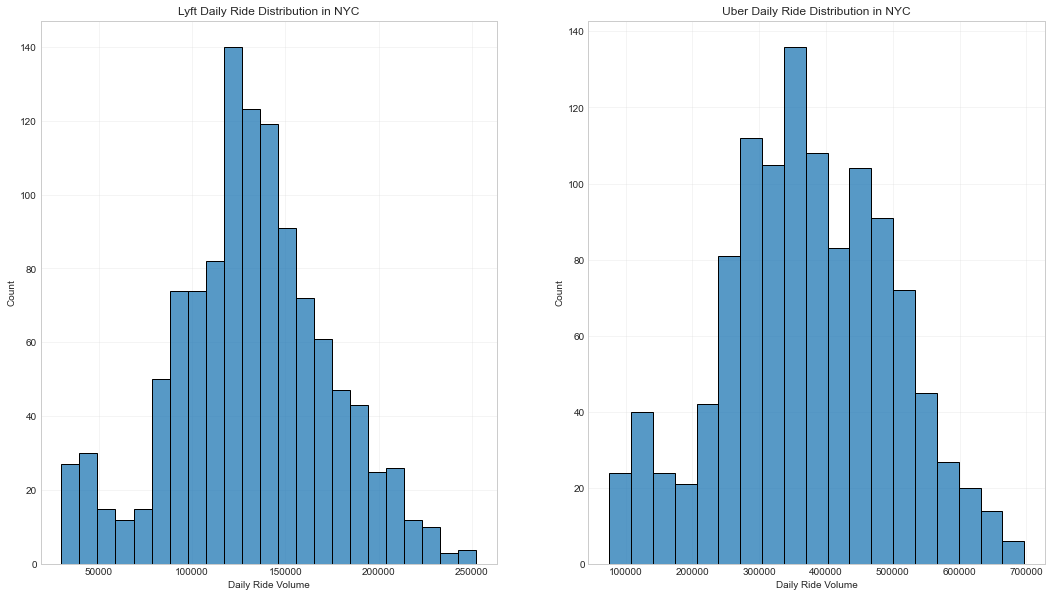

In [14]:
plt.subplot(121)
sns.histplot(data=data.lyft)
plt.title('Lyft Daily Ride Distribution in NYC')
plt.xlabel('Daily Ride Volume')
plt.grid(alpha=0.25)
plt.subplot(122)
sns.histplot(data=data.uber)
plt.title('Uber Daily Ride Distribution in NYC')
plt.xlabel('Daily Ride Volume')
plt.grid(alpha=0.25)
plt.show()

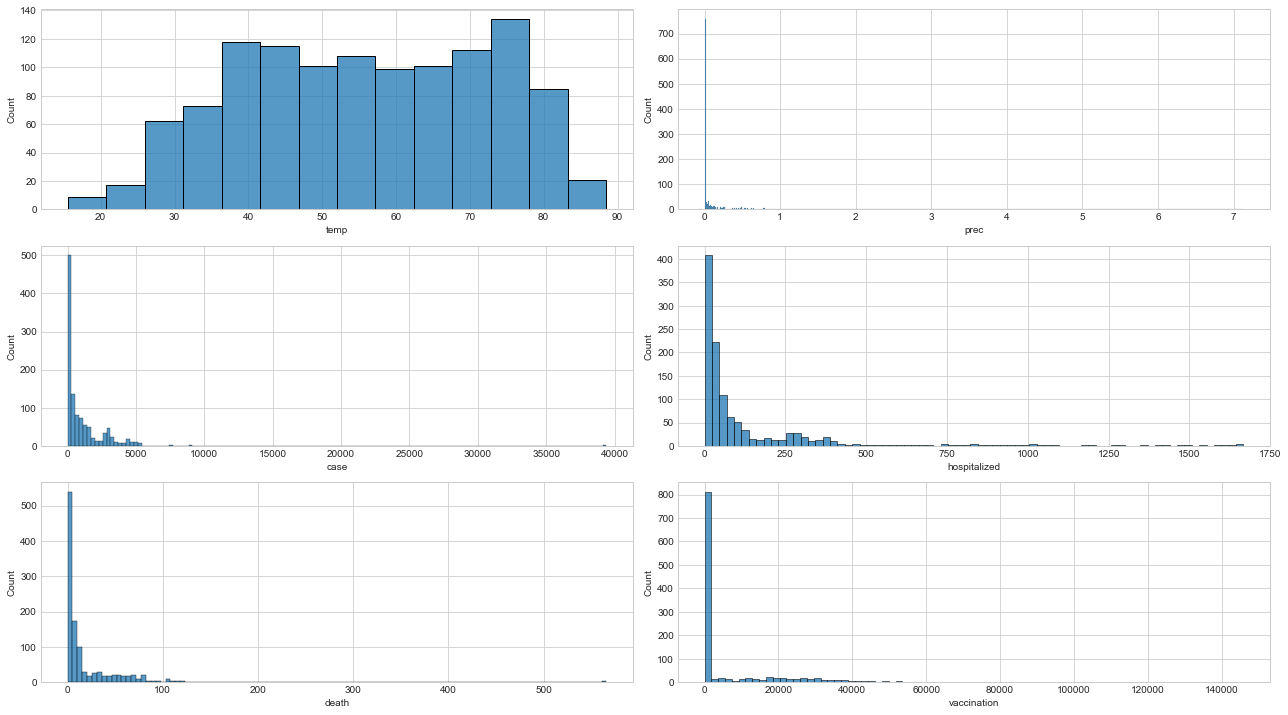

In [15]:
plt.subplot(321)
sns.histplot(data=data.temp)
plt.subplot(322)
sns.histplot(data=data.prec)
plt.subplot(323)
sns.histplot(data=data.case)
plt.subplot(324)
sns.histplot(data=data.hospitalized)
plt.subplot(325)
sns.histplot(data=data.death)
plt.subplot(326)
sns.histplot(data=data.vaccination)
plt.tight_layout()

### Research Question 1: 
### Which rideshare company had the most growth in NYC and its boroughs since the beginning of the Covid-19 pandemic?
***

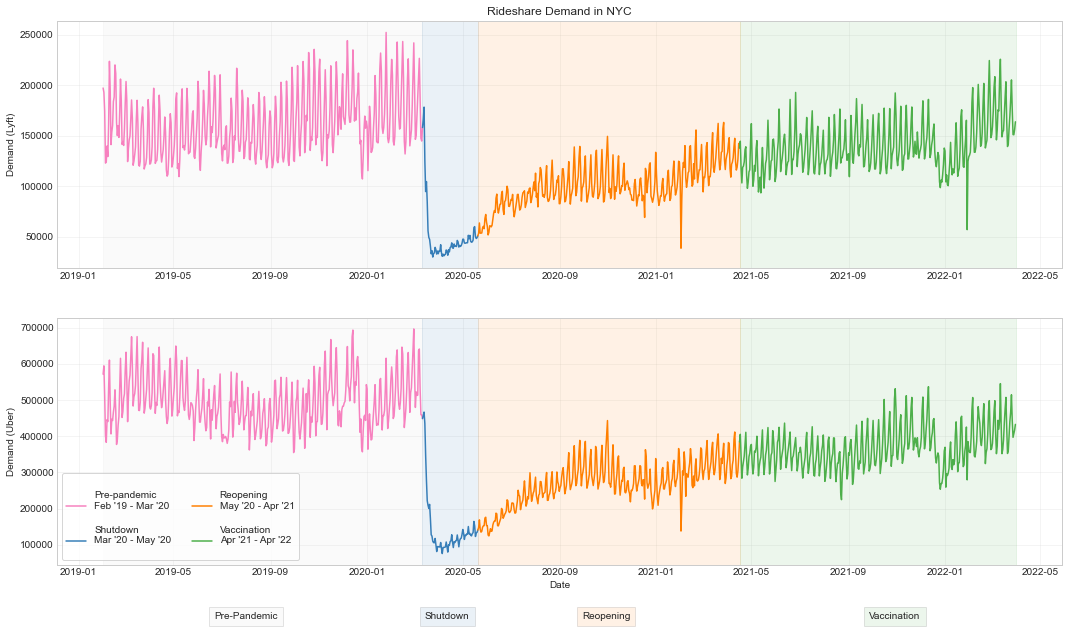

In [16]:
plt.subplot(211)
plt.title('Rideshare Demand in NYC')
plt.plot(p0.lyft, color=cbcolors[3])
plt.plot(p1.lyft, color=cbcolors[0])
plt.plot(p2.lyft, color=cbcolors[1])
plt.plot(p3.lyft, color=cbcolors[2])
plt.ylabel('Demand (Lyft)')
plot_phases()
plt.subplot(212)
plt.plot(p0.uber, color=cbcolors[3])
plt.plot(p1.uber, color=cbcolors[0])
plt.plot(p2.uber, color=cbcolors[1])
plt.plot(p3.uber, color=cbcolors[2])
plt.xlabel('Date')
plt.ylabel('Demand (Uber)')
plt.legend(phases_legend, ncol=2, frameon=True, fancybox=True, title=' ')
plot_phases(title=False)

### Research Question 2:
### What is the relationship between weather, Covid-19 cases, hospitalizations, deaths, vaccinations, and rideshare demand? 
***

In [17]:
lyft_regress = np.round(
    pd.DataFrame([linregress(data[['lyft', col]]) for col in data.columns[2:-1]], index=data.columns[2:-1]), 2)
uber_regress = np.round(
    pd.DataFrame([linregress(data[['uber', col]]) for col in data.columns[2:-1]], index=data.columns[2:-1]), 2)

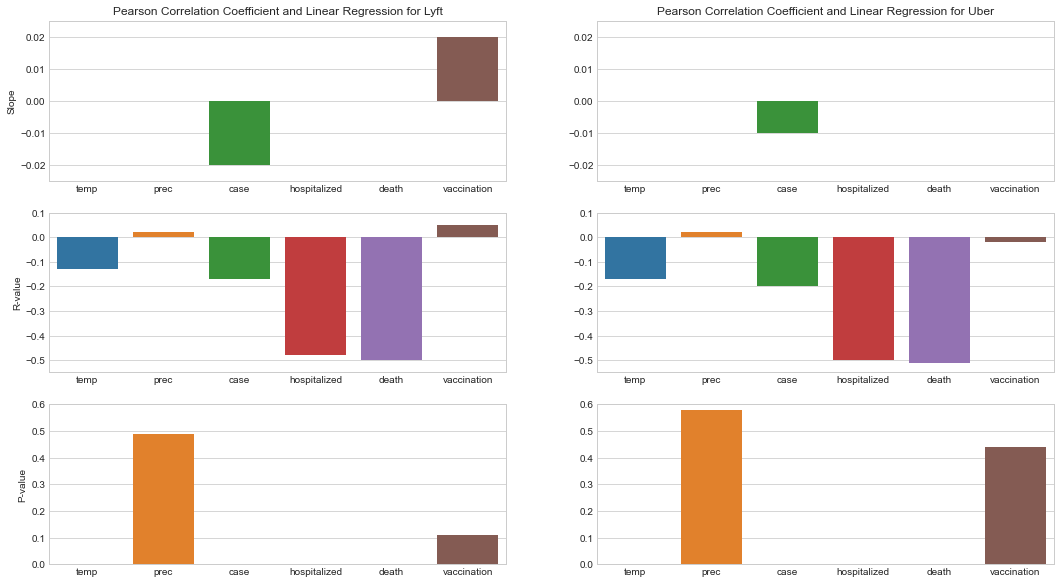

In [18]:
plt.subplot(321)
sns.barplot(data=lyft_regress[['slope']].transpose(), ci=None)
plt.title('Pearson Correlation Coefficient and Linear Regression for Lyft')
plt.ylabel('Slope')
plt.ylim(-0.025,0.025)
plt.subplot(322)
sns.barplot(data=uber_regress[['slope']].transpose(), ci=None)
plt.title('Pearson Correlation Coefficient and Linear Regression for Uber')
plt.ylim(-0.025,0.025)
plt.subplot(323)
sns.barplot(data=lyft_regress[['rvalue']].transpose(), ci=None)
plt.ylabel('R-value')
plt.ylim(-0.55,0.1)
plt.subplot(324)
sns.barplot(data=uber_regress[['rvalue']].transpose(), ci=None)
plt.ylim(-0.55,0.1)
plt.subplot(325)
sns.barplot(data=lyft_regress[['pvalue']].transpose(), ci=None)
plt.ylabel('P-value')
plt.ylim(0.0,0.6)
plt.subplot(326)
sns.barplot(data=uber_regress[['pvalue']].transpose(), ci=None)
plt.ylim(0.0,0.6)
plt.show()

In [19]:
lyft_regress.transpose()

,temp,prec,case,hospitalized,death,vaccination
slope,-0.00,0.00,-0.02,-0.00,-0.00,0.02
intercept,62.96,0.12,4134.52,508.55,147.72,5549.12
rvalue,-0.13,0.02,-0.17,-0.48,-0.50,0.05
pvalue,0.00,0.49,0.00,0.00,0.00,0.11
stderr,0.00,0.00,0.00,0.00,0.00,0.01


In [20]:
uber_regress.transpose()

,temp,prec,case,hospitalized,death,vaccination
slope,-0.00,0.00,-0.01,-0.00,-0.00,-0.00
intercept,64.43,0.12,4454.25,499.84,141.90,9245.40
rvalue,-0.17,0.02,-0.20,-0.50,-0.51,-0.02
pvalue,0.00,0.58,0.00,0.00,0.00,0.44
stderr,0.00,0.00,0.00,0.00,0.00,0.00


In [21]:
regress_lines = pd.DataFrame(index = ['slope', 'intercept', 'rvalue', 'pvalue', 'stderr'])

regress_lines['temp'] = linregress(data[['all_rideshare', 'temp']])
regress_lines['prec'] = linregress(data[['all_rideshare', 'prec']])
regress_lines['case'] = linregress(data[['all_rideshare', 'case']])
regress_lines['hospitalized'] = linregress(data[['all_rideshare', 'hospitalized']])
regress_lines['death'] = linregress(data[['all_rideshare', 'death']])
regress_lines['vaccination'] = linregress(p3[['all_rideshare', 'vaccination']])

np.round(regress_lines,2)

,temp,prec,case,hospitalized,death,vaccination
slope,-0.00,0.00,-0.01,-0.00,-0.00,-0.04
intercept,64.38,0.12,4474.28,515.29,147.34,44969.80
rvalue,-0.17,0.02,-0.20,-0.50,-0.51,-0.13
pvalue,0.00,0.55,0.00,0.00,0.00,0.01
stderr,0.00,0.00,0.00,0.00,0.00,0.01


In [22]:
def plot_var(var_name, color:int, label:str):
    sns.scatterplot(data[var_name], zscore(data.all_rideshare), color=cbcolors[color], label=label)
    sns.lineplot(data[var_name], 
                 zscore(regress_lines[var_name].loc['intercept']+regress_lines[var_name].loc['slope']*data[var_name]),
                 linestyle='dashed', color='dimgrey', label='Fitted Line')
    plt.ylabel('Demand (z-scores)')

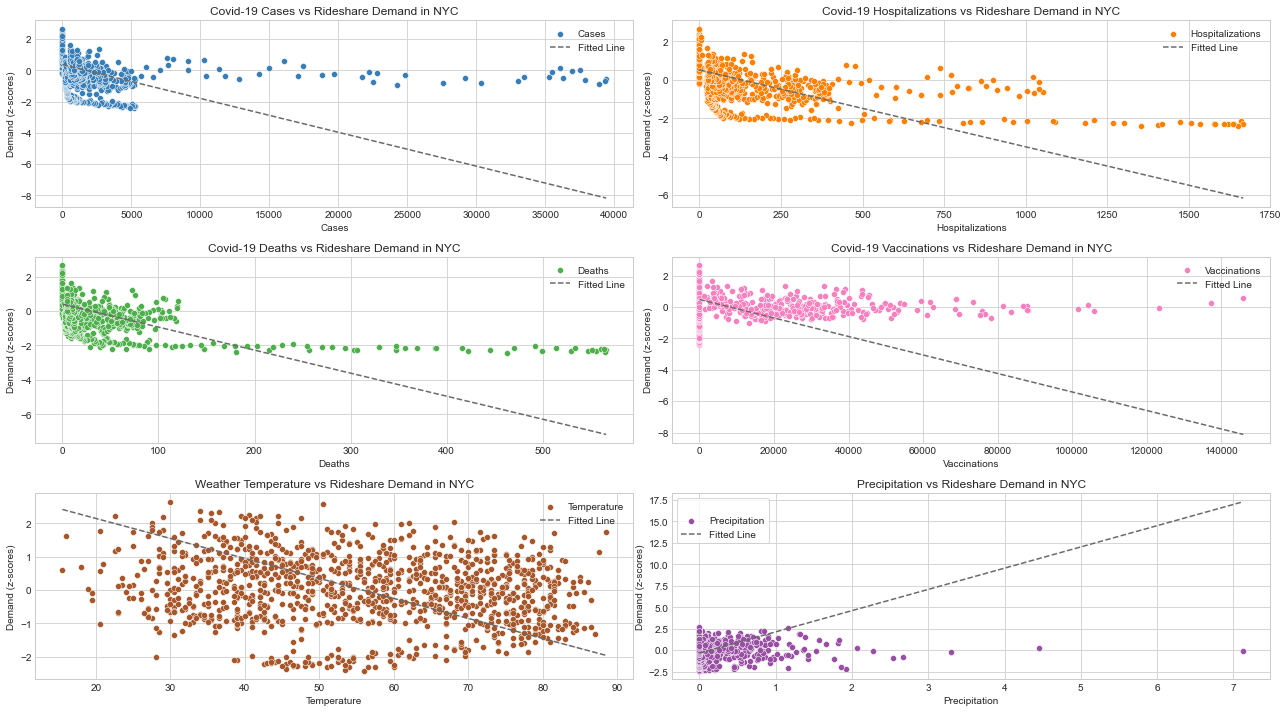

In [23]:
plt.subplot(321)
plot_var('case', 0, 'Cases')
plt.title('Covid-19 Cases vs Rideshare Demand in NYC')
plt.xlabel('Cases')
plt.subplot(322)
plot_var('hospitalized', 1, 'Hospitalizations')
plt.title('Covid-19 Hospitalizations vs Rideshare Demand in NYC')
plt.xlabel('Hospitalizations')
plt.subplot(323)
plot_var('death', 2, 'Deaths')
plt.title('Covid-19 Deaths vs Rideshare Demand in NYC')
plt.xlabel('Deaths', )
plt.subplot(324)
plot_var('vaccination', 3, 'Vaccinations')
plt.title('Covid-19 Vaccinations vs Rideshare Demand in NYC')
plt.xlabel('Vaccinations')
plt.subplot(325)
plot_var('temp', 4, 'Temperature')
plt.title('Weather Temperature vs Rideshare Demand in NYC')
plt.xlabel('Temperature')
plt.subplot(326)
plot_var('prec', 5, 'Precipitation')
plt.title('Precipitation vs Rideshare Demand in NYC')
plt.xlabel('Precipitation')
plt.legend(frameon=True, fancybox=True, title=' ')
plt.tight_layout()

### Research Question 3:
### Which predictive model and exogenous variables have the most impact on rideshare demand and forecasting?
***

>Models:
>* **Model 1:** Weather
>* **Model 2:** Covid-19 Cases
>* **Model 3:** Covid-19 Vaccinations
>* **Model 4:** Weather and Covid-19 Cases
>* **Model 5:** Weather and Covid-19 Vaccinations
>* **Model 6:** Covid-19 Cases and Covid-19 Vaccinations
>* **Model 7:** Weather, Covid-19 Cases, and Covid-19 Vaccinations

In [24]:
lyft_metrics = pd.read_parquet('data/lyft_model_metrics.parquet')
uber_metrics = pd.read_parquet('data/uber_model_metrics.parquet')

In [25]:
a=((lyft_metrics.loc['sarimax'].mape.control-lyft_metrics.loc['sarimax'].mape[['model_4', 'model_5']].mean())/
    lyft_metrics.loc['sarimax'].mape.control)*100

In [26]:
b=((lyft_metrics.loc['prophet'].mape.control-lyft_metrics.loc['prophet'].mape[['model_5', 'model_6']].mean())/
    lyft_metrics.loc['prophet'].mape.control)*100

In [27]:
c=((lyft_metrics.loc['xgboost'].mape.control-lyft_metrics.loc['xgboost'].mape[['model_3', 'model_4']].mean())/
    lyft_metrics.loc['xgboost'].mape.control)*100

In [28]:
(a+b+c)/3

9.096203595419087

In [29]:
lyft_metrics

rmse   mape  z_score         pvalue  observed_mean  \
sarimax  control   23910.85  11.99    5.948   2.712468e-09      141329.33   
         model_1   85993.42  50.06   29.409  4.224841e-190      141329.33   
         model_2   24465.21  12.23    6.046   1.487628e-09      141329.33   
         model_3   39889.40  18.73    0.128   8.985050e-01      141329.33   
         model_4   23209.42  11.68    5.877   4.189581e-09      141329.33   
         model_5   23845.74  11.96    5.878   4.163079e-09      141329.33   
         model_6   40446.70  22.61   20.802   4.149981e-96      141329.33   
prophet  control   23773.53  14.73   -9.736   2.126197e-22      141329.33   
         model_1   22778.34  13.96   -9.094   9.545081e-20      141329.33   
         model_2   24259.38  15.06   -9.996   1.580099e-23      141329.33   
         model_3   77356.77  39.40   -3.100   1.934716e-03      141329.33   
         model_4   26006.50  16.16  -10.505   8.221832e-26      141329.33   
         model_5   21178.04  12.77   -7.715   1.210982e-14      141329.33   
         model_6   15790.01   8.89   -2.598   9.367972e-03      141329.33   
xgboost  control   24091.72  12.38    6.639   3.166182e-11      141329.33   
         model_1   24919.95  12.66    8.813   1.217047e-18      141329.33   
         model_2   24925.84  12.65    8.881   6.632325e-19      141329.33   
         model_3   24151.31  12.32    6.990   2.740757e-12      141329.33   
         model_4   24923.99  12.59    8.839   9.660779e-19      141329.33   
         model_5   24925.84  12.65    8.881   6.632325e-19      141329.33   
         model_6   24925.84  12.65    8.881   6.632325e-19      141329.33   
prophet  model_7   16351.71   9.44   -3.596   3.233447e-04      141329.33   
         model_8   17399.55   9.99   -4.696   2.657109e-06      141329.33   
         model_9   16474.47   9.52   -3.760   1.697676e-04      141329.33   
forecast forecast       NaN    NaN   -5.330   0.000000e+00      131524.86   

                   forecast_mean  observed_std  forecast_std  
sarimax  control       132563.03      24706.00      10727.75  
         model_1        69883.23      24706.00      36890.12  
         model_2       132348.92      24706.00      11250.61  
         model_3       141064.45      24706.00      28808.88  
         model_4       132468.71      24706.00      12204.38  
         model_5       132666.39      24706.00      10732.40  
         model_6       109382.86      24706.00      13317.29  
prophet  control       159535.71      24706.00      23615.46  
         model_1       158279.32      24706.00      23450.48  
         model_2       160063.82      24706.00      23721.95  
         model_3       156500.76      24706.00      85959.12  
         model_4       162345.30      24706.00      26952.93  
         model_5       155985.47      24706.00      24392.72  
         model_6       146091.02      24706.00      22612.58  
xgboost  control       132216.42      24706.00       4357.80  
         model_1       129086.51      24706.00       5842.82  
         model_2       129003.30      24706.00       5744.27  
         model_3       131442.55      24706.00       7595.88  
         model_4       129058.72      24706.00       5768.97  
         model_5       129003.30      24706.00       5744.27  
         model_6       129003.30      24706.00       5744.27  
prophet  model_7       148055.36      24706.00      23626.39  
         model_8       149980.15      24706.00      22874.06  
         model_9       148355.88      24706.00      23577.60  
forecast forecast      133236.66      41571.46      37635.94

In [30]:
lyft_metrics.drop([('prophet', 'model_7'), ('prophet', 'model_8'), ('prophet', 'model_9'), ('forecast', 'forecast')], 
                  inplace=True)
uber_metrics.drop([('prophet', 'model_7'), ('prophet', 'model_8'), ('prophet', 'model_9'), ('forecast', 'forecast')], 
                  inplace=True)

In [31]:
np.round(lyft_metrics.describe(), 2)

,rmse,mape,z_score,pvalue,observed_mean,forecast_mean,observed_std,forecast_std
count,21.00,21.00,21.00,21.00,21.00,21.00,21.0,21.00
mean,30750.85,16.58,3.77,0.04,141329.33,136094.91,24706.0,18830.24
std,17807.62,9.92,10.22,0.20,0.00,20829.04,0.0,18114.98
min,15790.01,8.89,-10.50,0.00,141329.33,69883.23,24706.0,4357.80
25%,23845.74,12.32,-3.10,0.00,141329.33,129058.72,24706.0,5842.82
50%,24465.21,12.65,5.95,0.00,141329.33,132468.71,24706.0,12204.38
75%,24925.84,15.06,8.84,0.00,141329.33,155985.47,24706.0,23721.95
max,85993.42,50.06,29.41,0.90,141329.33,162345.30,24706.0,85959.12


In [32]:
np.round(uber_metrics,2)

rmse   mape  z_score  pvalue  observed_mean  \
sarimax control   73182.06  13.99    12.24    0.00      370507.73   
        model_1   60777.40  11.59     9.23    0.00      370507.73   
        model_2   62094.37  12.21     7.03    0.00      370507.73   
        model_3  175354.19  27.25    -1.04    0.30      370507.73   
        model_4   74231.48  14.73    12.20    0.00      370507.73   
        model_5   71956.58  13.81    11.74    0.00      370507.73   
        model_6  121529.67  26.38    28.20    0.00      370507.73   
prophet control   39541.93   8.07     4.83    0.00      370507.73   
        model_1   38032.45   7.75     3.98    0.00      370507.73   
        model_2   39468.39   7.91     3.29    0.00      370507.73   
        model_3  205198.04  26.45     3.81    0.00      370507.73   
        model_4   47045.16  10.34     6.90    0.00      370507.73   
        model_5   44772.84   9.66     6.82    0.00      370507.73   
        model_6   43337.47   9.06     6.49    0.00      370507.73   
xgboost control   54352.91  11.50     1.05    0.29      370507.73   
        model_1   55134.90  11.04     5.72    0.00      370507.73   
        model_2   55457.54  11.16     5.79    0.00      370507.73   
        model_3   57026.94  11.82     2.92    0.00      370507.73   
        model_4   55457.54  11.16     5.79    0.00      370507.73   
        model_5   66037.51  13.48    12.20    0.00      370507.73   
        model_6   55311.24  11.11     5.86    0.00      370507.73   

                 forecast_mean  observed_std  forecast_std  
sarimax control      328625.19      57620.28      24349.79  
        model_1      339807.68      57620.28      19399.39  
        model_2      346687.41      57620.28      22691.23  
        model_3      379834.35      57620.28     152884.22  
        model_4      326425.48      57620.28      32312.75  
        model_5      330333.46      57620.28      24256.86  
        model_6      267818.63      57620.28      33313.48  
prophet control      350029.01      57620.28      51899.00  
        model_1      353562.34      57620.28      52301.35  
        model_2      356359.16      57620.28      53418.19  
        model_3      323071.44      57620.28     220238.15  
        model_4      338952.73      57620.28      60453.77  
        model_5      340980.83      57620.28      54164.35  
        model_6      343042.14      57620.28      51647.76  
xgboost control      367160.06      57620.28       8344.25  
        model_1      351819.16      57620.28      15592.30  
        model_2      351555.12      57620.28      16150.92  
        model_3      360664.22      57620.28      21635.99  
        model_4      351555.12      57620.28      16150.92  
        model_5      327584.97      57620.28      28524.84  
        model_6      351356.03      57620.28      15936.38

In [33]:
uber_metrics.describe()

,rmse,mape,z_score,pvalue,observed_mean,forecast_mean,observed_std,forecast_std
count,21.000000,21.000000,21.000000,2.100000e+01,2.100000e+01,21.000000,2.100000e+01,21.000000
mean,71204.790952,13.355714,7.382667,2.832249e-02,3.705077e+05,342248.787143,5.762028e+04,46460.280476
std,43718.878791,5.904073,5.982651,8.867921e-02,1.789353e-10,22189.093255,1.491128e-11,50340.700372
min,38032.450000,7.750000,-1.043000,6.382475e-175,3.705077e+05,267818.630000,5.762028e+04,8344.250000
25%,47045.160000,10.340000,3.980000,2.750011e-20,3.705077e+05,330333.460000,5.762028e+04,19399.390000
50%,55457.540000,11.500000,5.855000,4.779398e-09,3.705077e+05,346687.410000,5.762028e+04,28524.840000
75%,71956.580000,13.810000,9.228000,6.900648e-05,3.705077e+05,351819.160000,5.762028e+04,52301.350000
max,205198.040000,27.250000,28.197000,2.968273e-01,3.705077e+05,379834.350000,5.762028e+04,220238.150000


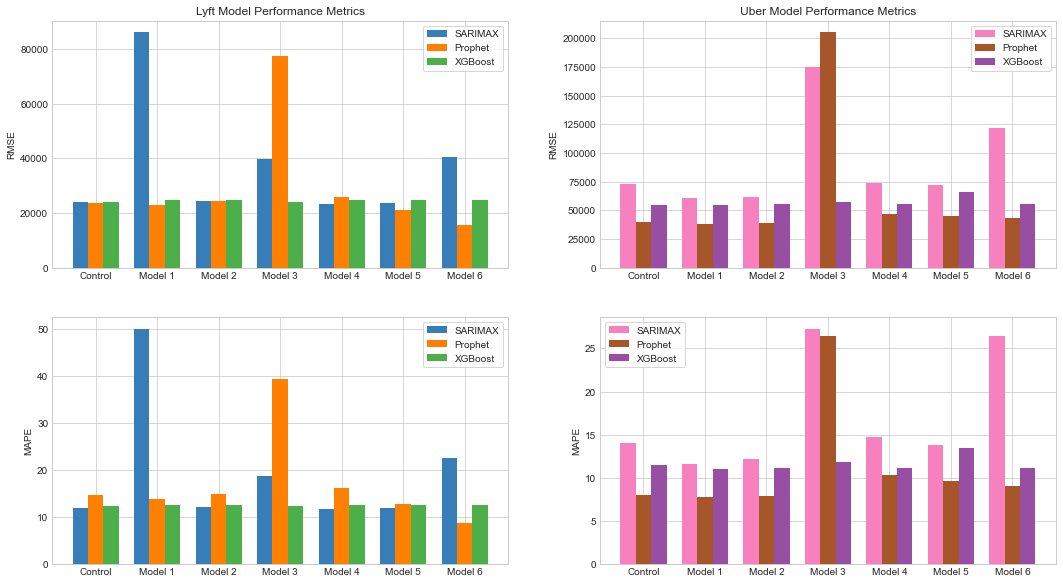

In [34]:
x = ['Control', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']
x_ticks = np.arange(len(x))
width = 0.25

plt.subplot(221)
plt.title('Lyft Model Performance Metrics')
plt.bar(x_ticks-width, lyft_metrics.loc['sarimax'].rmse, width, label='SARIMAX', color=cbcolors[0])
plt.bar(x_ticks, lyft_metrics.loc['prophet'].rmse, width, label='Prophet', color=cbcolors[1])
plt.bar(x_ticks+width, lyft_metrics.loc['xgboost'].rmse, width, label='XGBoost', color=cbcolors[2])
plt.xticks(x_ticks, x)
plt.legend(frameon=True, fancybox=True)
plt.ylabel('RMSE')

plt.subplot(222)
plt.title('Uber Model Performance Metrics')
plt.bar(x_ticks-width, uber_metrics.loc['sarimax'].rmse, width, label='SARIMAX', color=cbcolors[3])
plt.bar(x_ticks, uber_metrics.loc['prophet'].rmse, width, label='Prophet', color=cbcolors[4])
plt.bar(x_ticks+width, uber_metrics.loc['xgboost'].rmse, width, label='XGBoost', color=cbcolors[5])
plt.xticks(x_ticks, x)
plt.legend(frameon=True, fancybox=True)
plt.ylabel('RMSE')

plt.subplot(223)
plt.bar(x_ticks-width, lyft_metrics.loc['sarimax'].mape, width, label='SARIMAX', color=cbcolors[0])
plt.bar(x_ticks, lyft_metrics.loc['prophet'].mape, width, label='Prophet', color=cbcolors[1])
plt.bar(x_ticks+width, lyft_metrics.loc['xgboost'].mape, width, label='XGBoost', color=cbcolors[2])
plt.xticks(x_ticks, x)
plt.legend(frameon=True, fancybox=True)
plt.ylabel('MAPE')

plt.subplot(224)
plt.bar(x_ticks-width, uber_metrics.loc['sarimax'].mape, width, label='SARIMAX', color=cbcolors[3])
plt.bar(x_ticks, uber_metrics.loc['prophet'].mape, width, label='Prophet', color=cbcolors[4])
plt.bar(x_ticks+width, uber_metrics.loc['xgboost'].mape, width, label='XGBoost', color=cbcolors[5])
plt.xticks(x_ticks, x)
plt.legend(frameon=True, fancybox=True)
plt.ylabel('MAPE')
plt.show()

### Research Question 4:
### What is the forecasted growth of rideshare demand for each company?
***

In [35]:
lyft_fcast = pd.read_parquet('data/lyft_forecast.parquet')
uber_fcast = pd.read_parquet('data/uber_forecast.parquet')

In [36]:
lyft_fcast.head(3)

,yhat,yhat_lower,yhat_upper,vaccinations
ds,,,,
2019-02-01,163365.96,141195.55,184800.55,0.0
2019-02-02,179403.51,159739.28,201214.69,0.0
2019-02-03,159786.71,140250.34,179211.52,0.0


In [37]:
uber_fcast.head(3)

,yhat,yhat_lower,yhat_upper,temp
ds,,,,
2019-02-01,561769.07,513463.68,610497.87,16.0
2019-02-02,577989.45,527134.19,629702.33,25.0
2019-02-03,507049.19,457140.36,555611.47,43.0


In [38]:
def plot_avg(fcast, is_fcast=True, legend=True):
    if is_fcast == False:
        x1 = fcast.index[0]
    else:
        x1 = fcast[fcast_start:].index[0]
    x2 = fcast.index[-1]
    
    plt.plot((x1, x2), (fcast.yhat[:p1_start].mean(), fcast.yhat[:p1_start].mean()), 
             label = 'Pre-Pandemic Average Demand', color=cbcolors[4], alpha=0.75)
    plt.plot((x1, x2), (fcast.yhat[p3_start:fcast_start].mean(), fcast.yhat[p3_start:fcast_start].mean()), 
             label='Vaccination Phase Average Demand', color=cbcolors[2], alpha=0.75)
    plt.plot((x1, x2), (fcast[fcast_start:].yhat.mean(), fcast[fcast_start:].yhat.mean()), 
             label='Forecasted Average Demand', color=cbcolors[5], alpha=0.75)
    
    if legend == True:
        plt.legend()

In [39]:
def plot_fcast(fcast, legend=True):
    plt.plot(fcast.yhat[fcast_start:], 
             label='Forecasted Demand', color=cbcolors[3])

    plt.fill_between(fcast[fcast_start:].index, 
                     fcast.yhat_lower[fcast_start:], 
                     fcast.yhat_upper[fcast_start:], 
                     label='Confidence Intervals', 
                     color=cbcolors[3], alpha=0.25)
    if legend == True:
        plt.legend()

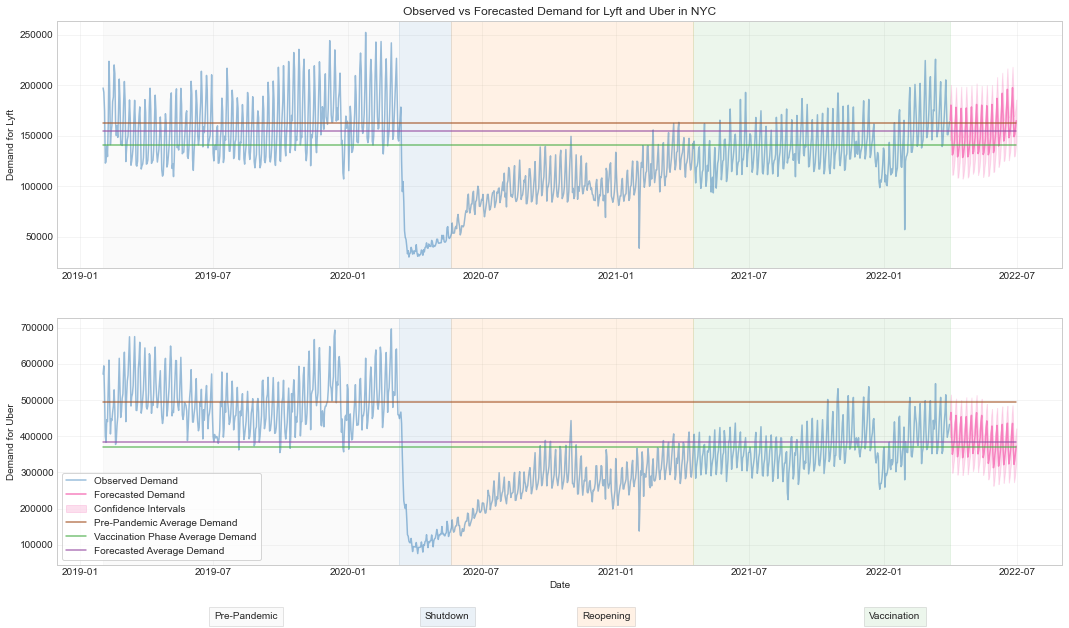

In [40]:
# Lyft
plt.subplot(211)
plt.title('Observed vs Forecasted Demand for Lyft and Uber in NYC')
plt.plot(data.lyft, color=cbcolors[0], alpha=0.5)
plot_fcast(lyft_fcast, legend=False)
plot_avg(lyft_fcast, is_fcast=False, legend=False)
plt.ylabel('Demand for Lyft')
plot_phases()

# Uber
plt.subplot(212)
plt.plot(data.uber, color=cbcolors[0], alpha=0.5, label='Observed Demand')
plot_fcast(uber_fcast)
plot_avg(uber_fcast, is_fcast=False)
plt.ylabel('Demand for Uber')
plt.xlabel('Date')
plot_phases(title=False)
plt.legend(frameon=True, fancybox=True)
plt.show()

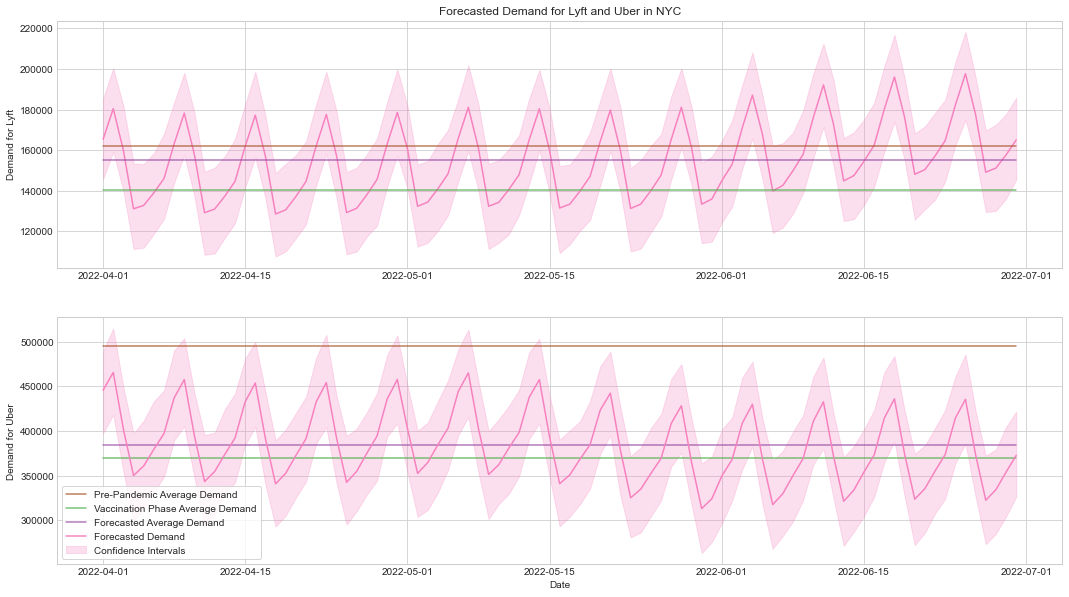

In [41]:
plt.subplot(211)
plot_fcast(lyft_fcast, legend=False)
plot_avg(lyft_fcast, legend=False)
plt.title('Forecasted Demand for Lyft and Uber in NYC')
plt.ylabel('Demand for Lyft')

plt.subplot(212)
plot_avg(uber_fcast)
plot_fcast(uber_fcast)
plt.ylabel('Demand for Uber')
plt.xlabel('Date')
plt.legend(frameon=True, fancybox=True)
plt.show()

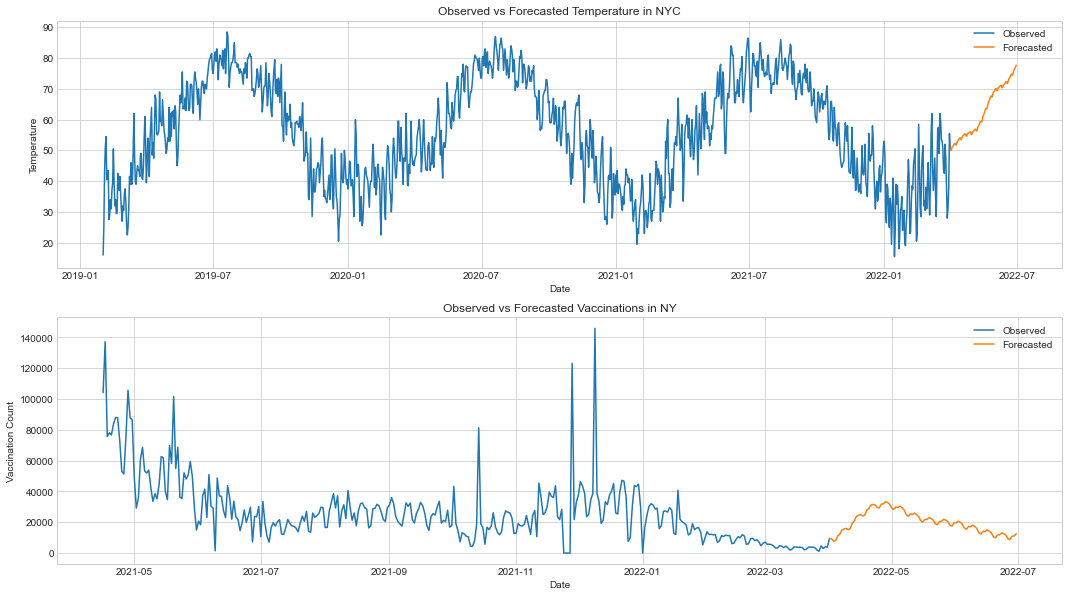

In [42]:
plt.subplot(211)
plt.plot(uber_fcast.temp[:'2022/04/01'], label='Observed')
plt.plot(uber_fcast.temp['2022-04-01':], label='Forecasted')
plt.title('Observed vs Forecasted Temperature in NYC')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.subplot(212)
plt.plot(lyft_fcast.vaccinations['2021/04/16':'2022/04/01'], label='Observed')
plt.plot(lyft_fcast.vaccinations['2022/04/01':], label='Forecasted')
plt.title('Observed vs Forecasted Vaccinations in NY')
plt.xlabel('Date')
plt.ylabel('Vaccination Count')
plt.legend()
plt.show()

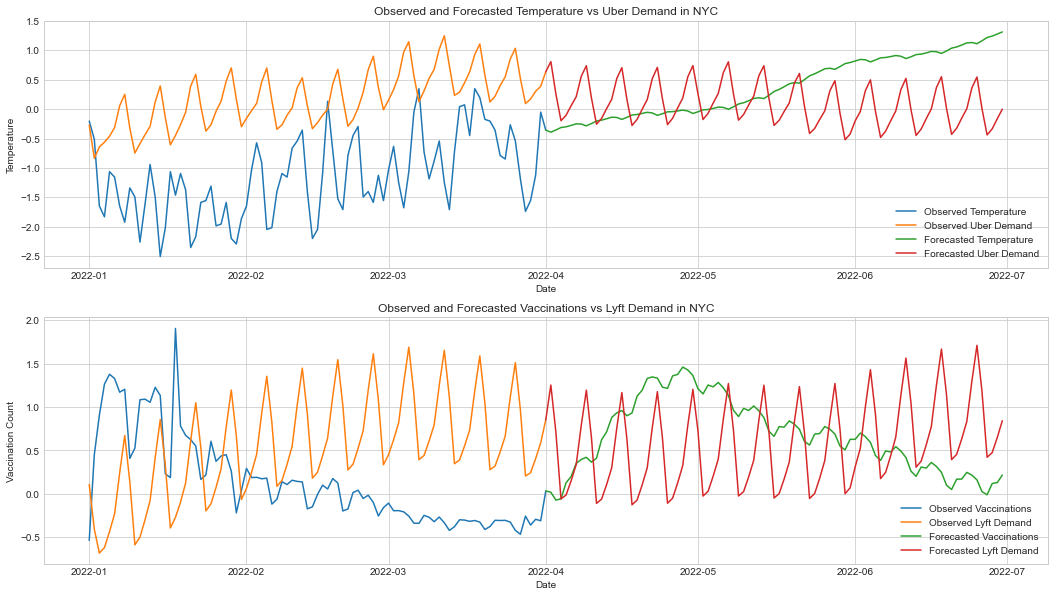

In [43]:
plt.subplot(211)
plt.plot(zscore(uber_fcast.temp)['2022/01/01':'2022/04/01'], label='Observed Temperature')
plt.plot(zscore(uber_fcast.yhat)['2022/01/01':'2022/04/01'], label='Observed Uber Demand')
plt.plot(zscore(uber_fcast.temp)['2022/04/01':], label='Forecasted Temperature')
plt.plot(zscore(uber_fcast.yhat)['2022/04/01':], label='Forecasted Uber Demand')
plt.title('Observed and Forecasted Temperature vs Uber Demand in NYC')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.subplot(212)
plt.plot(zscore(lyft_fcast.vaccinations)['2022/01/01':'2022/04/01'], label='Observed Vaccinations')
plt.plot(zscore(lyft_fcast.yhat)['2022/01/01':'2022/04/01'], label='Observed Lyft Demand')
plt.plot(zscore(lyft_fcast.vaccinations)['2022/04/01':], label='Forecasted Vaccinations')
plt.plot(zscore(lyft_fcast.yhat)['2022/04/01':], label='Forecasted Lyft Demand')
plt.title('Observed and Forecasted Vaccinations vs Lyft Demand in NYC')
plt.xlabel('Date')
plt.ylabel('Vaccination Count')
plt.legend()
plt.show()

In [44]:
lyft_desc = pd.DataFrame(p0.lyft.describe())
lyft_desc.columns=['pre_pandemic']
lyft_desc['shutdown'] = p1.lyft.describe()
lyft_desc['reopening'] = p2.lyft.describe()
lyft_desc['vaccination'] = p3.lyft.describe()
lyft_desc['forecast'] = lyft_fcast.yhat.describe()

In [45]:
lyft_desc

,pre_pandemic,shutdown,reopening,vaccination,forecast
count,405.000000,71.000000,332.000000,350.000000,1246.000000
mean,162503.256790,50068.450704,101552.385542,140497.722857,133236.655522
std,30923.739949,29599.454866,21730.068561,24714.346978,37651.056476
min,107190.000000,29797.000000,38577.000000,56955.000000,24351.850000
25%,137949.000000,36030.000000,87770.000000,122661.250000,110820.477500
50%,158201.000000,42034.000000,99156.500000,137094.000000,139191.850000
75%,184824.000000,47709.500000,116247.250000,153214.500000,159703.817500
max,252442.000000,178433.000000,163246.000000,225861.000000,223866.920000


In [46]:
uber_desc = pd.DataFrame(p0.uber.describe())
uber_desc.columns=['pre_pandemic']
uber_desc['shutdown'] = p1.uber.describe()
uber_desc['reopening'] = p2.uber.describe()
uber_desc['vaccination'] = p3.uber.describe()
uber_desc['forecast'] = uber_fcast.yhat.describe()

In [47]:
uber_desc

,pre_pandemic,shutdown,reopening,vaccination,forecast
count,405.000000,71.000000,332.000000,350.000000,1246.000000
mean,496148.397531,144827.661972,270987.617470,369503.125714,372782.252464
std,70192.913218,87285.784042,61538.324128,57160.216223,115248.108123
min,354798.000000,75549.000000,124428.000000,224563.000000,74406.710000
25%,446485.000000,102525.500000,237018.500000,329801.500000,296546.780000
50%,487695.000000,118372.000000,272957.500000,361929.000000,373686.195000
75%,539661.000000,132805.000000,308656.000000,400329.250000,461397.932500
max,696721.000000,466850.000000,443352.000000,545487.000000,643843.930000


In [48]:
def get_growth(past, present):
    rate = ((present.mean()-past.mean())/past.mean())*100
    return rate

In [49]:
lyft_p0_growth = get_growth(p0.iloc[:int(len(p0)/2+0.5)].lyft, p0.iloc[int(len(p0)/2+0.5):].lyft)
lyft_p1_growth = get_growth(lyft_fcast.yhat[:p1_start], lyft_fcast.yhat[p1_start:p2_start])
lyft_p2_growth = get_growth(lyft_fcast.yhat[p1_start:p2_start], lyft_fcast.yhat[p2_start:p3_start])
lyft_p3_growth = get_growth(lyft_fcast.yhat[p2_start:p3_start], lyft_fcast.yhat[p3_start:fcast_start])
lyft_fcast_growth = get_growth(lyft_fcast[p3_start:fcast_start].yhat, lyft_fcast[fcast_start:].yhat)

uber_p0_growth = get_growth(p0.iloc[:int(len(p0)/2+0.5)].uber, p0.iloc[int(len(p0)/2+0.5):].uber)
uber_p1_growth = get_growth(uber_fcast.yhat[:p1_start], uber_fcast.yhat[p1_start:p2_start])
uber_p2_growth = get_growth(uber_fcast.yhat[p1_start:p2_start], uber_fcast.yhat[p2_start:p3_start])
uber_p3_growth = get_growth(uber_fcast.yhat[p2_start:p3_start], uber_fcast.yhat[p3_start:fcast_start])
uber_fcast_growth = get_growth(uber_fcast[p3_start:fcast_start].yhat, uber_fcast[fcast_start:].yhat)

growth = pd.DataFrame([
    [lyft_p0_growth, uber_p0_growth],
    [lyft_p1_growth, uber_p1_growth],
    [lyft_p2_growth, uber_p2_growth],
    [lyft_p3_growth, uber_p3_growth],
    [lyft_fcast_growth, uber_fcast_growth]], 
    index=['pre_pandemic', 'shutdown', 'reopening', 'vaccination', 'forecast'], 
    columns=['lyft', 'uber'])

In [50]:
growth

,lyft,uber
pre_pandemic,10.292052,0.166399
shutdown,-69.057582,-70.684254
reopening,102.262853,86.609696
vaccination,38.438230,36.402272
forecast,10.229499,3.860942


In [51]:
lyft_p0_mean = lyft_fcast.yhat[:p1_start].mean()
lyft_p1_mean = lyft_fcast.yhat[p1_start:p2_start].mean()
lyft_p2_mean = lyft_fcast.yhat[p2_start:p3_start].mean()
lyft_p3_mean = lyft_fcast.yhat[p3_start:fcast_start].mean()
lyft_fcast_mean = lyft_fcast.yhat[fcast_start:].mean()

uber_p0_mean = uber_fcast.yhat[:p1_start].mean()
uber_p1_mean = uber_fcast.yhat[p1_start:p2_start].mean()
uber_p2_mean = uber_fcast.yhat[p2_start:p3_start].mean()
uber_p3_mean = uber_fcast.yhat[p3_start:fcast_start].mean()
uber_fcast_mean = uber_fcast.yhat[fcast_start:].mean()

avg_rides = pd.DataFrame([
    [lyft_p0_mean, uber_p0_mean],
    [lyft_p1_mean, uber_p1_mean],
    [lyft_p2_mean, uber_p2_mean],
    [lyft_p3_mean, uber_p3_mean],
    [lyft_fcast_mean, uber_fcast_mean]], 
    index = ['pre_pandemic', 'shutdown', 'reopening', 'vaccination', 'forecast'],
columns=['lyft', 'uber'])

In [52]:
avg_rides

,lyft,uber
pre_pandemic,162242.844444,495462.408469
shutdown,50201.859859,145248.502958
reopening,101539.713825,271047.790090
vaccination,140569.782678,369715.344074
forecast,154949.367473,383989.839560


In [53]:
lyft_fcast_increase = avg_rides.lyft.loc['forecast'] - avg_rides.lyft.loc['vaccination']
uber_fcast_increase = avg_rides.uber.loc['forecast'] - avg_rides.uber.loc['vaccination']
lyft_fcast_increase, uber_fcast_increase

(14379.584794464667, 14274.495486365282)

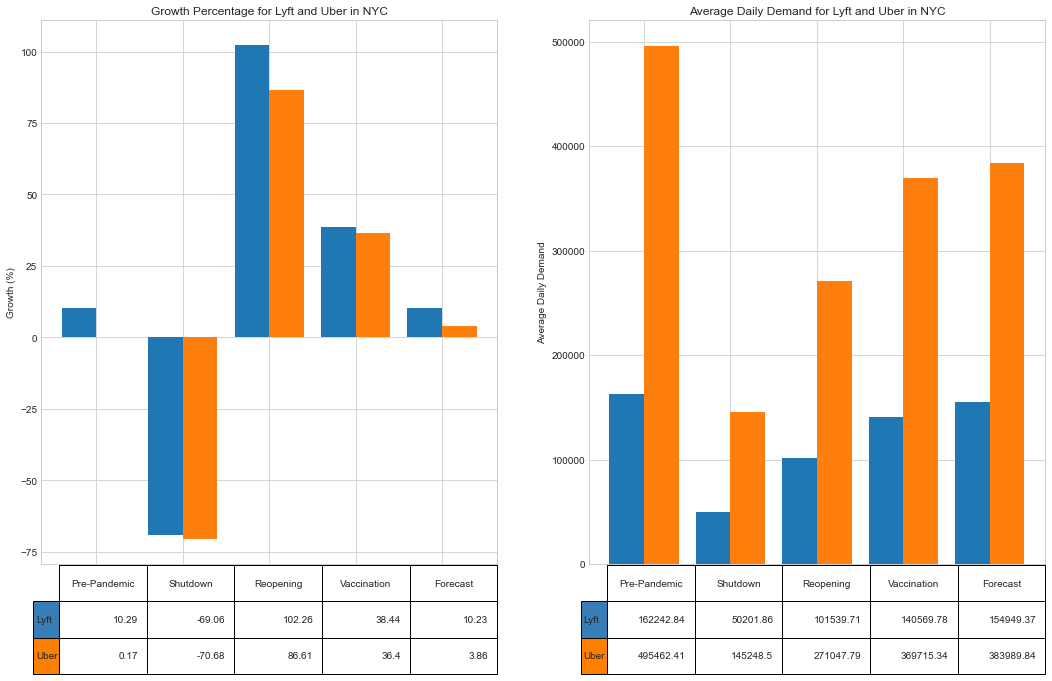

In [54]:
labels = ['Pre-Pandemic', 'Shutdown', 'Reopening', 'Vaccination', 'Forecast']
x_ticks = np.arange(len(labels))
width = 0.4

plt.subplot(121)
plt.title('Growth Percentage for Lyft and Uber in NYC')
plt.bar(x_ticks-width/2, growth['lyft'], width)
plt.bar(x_ticks+width/2, growth['uber'], width)
plt.xticks(alpha=0)
plt.ylabel('Growth (%)')

plt.table(cellText=np.round([growth.lyft.values, growth.uber.values],2),
          rowLabels=['Lyft', 'Uber'],
          rowColours=[cbcolors[0], cbcolors[1]],
          colLabels=labels,
          loc='bottom',
          bbox=[0.04, -0.202, 0.96, 0.2])

plt.subplot(122)
plt.title('Average Daily Demand for Lyft and Uber in NYC')
plt.bar(x_ticks-width/2, avg_rides['lyft'], width, label='Lyft')
plt.bar(x_ticks+width/2, avg_rides['uber'], width, label='Uber')
plt.xticks(alpha=0)
plt.ylabel('Average Daily Demand')

plt.table(cellText=np.round([avg_rides.lyft.values, avg_rides.uber.values],2),
          rowLabels=['Lyft', 'Uber'],
          rowColours=[cbcolors[0], cbcolors[1]],
          colLabels=labels,
          loc='bottom',
          bbox=[0.04, -0.202, 0.96, 0.2])
plt.show()

In [55]:
zscores = np.round(pd.DataFrame(
    [ztest(lyft_fcast.yhat, data.lyft['2022-01-01':]), ztest(uber_fcast.yhat, data.uber['2022-01-01':])],
    index=['lyft', 'uber'], columns=['zscore', 'pvalue']).transpose(),4)

In [56]:
zscores

,lyft,uber
zscore,-4.9977,-1.6765
pvalue,0.0000,0.0936
